In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.decomposition import  PCA
import pandas as pd
import numpy as np
import json
from pprint import pprint

In [3]:
!pwd

/home/ubuntu/uber_app


In [4]:
raw_data = pd.read_json("./uber_data_challenge v2.json")

In [5]:
raw_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,uber_black_user,weekday_pct
0,3.67,5,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5,5,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [6]:
raw_data.dtypes

avg_dist                  float64
avg_rating_by_driver       object
avg_rating_of_driver       object
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
uber_black_user              bool
weekday_pct               float64
dtype: object

In [7]:
raw_data['last_trip_date'] = pd.to_datetime(raw_data['last_trip_date'])
raw_data['signup_date'] = pd.to_datetime(raw_data['signup_date'])

In [8]:
current_date = max(raw_data['last_trip_date'])

In [9]:
current_date

Timestamp('2014-07-01 00:00:00')

In [10]:
diffs = current_date - raw_data['last_trip_date']

In [12]:
raw_data['days_since_last_trip'] = [x.days for x in diffs]

In [13]:
labels = [x < 30 for x in raw_data['days_since_last_trip']]

In [33]:
just_numbers = raw_data[['avg_dist','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']]
print(just_numbers.head())

   avg_dist  avg_surge  surge_pct  trips_in_first_30_days  weekday_pct
0      3.67       1.10       15.4                       4         46.2
1      8.26       1.00        0.0                       0         50.0
2      0.77       1.00        0.0                       3        100.0
3      2.36       1.14       20.0                       9         80.0
4      3.13       1.19       11.8                      14         82.4


Let's start by projecting our data into fewer dimensions to explore it a bit.  We'll start by reducing the dimensions to the two principal component analysis.

In [15]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(just_numbers)

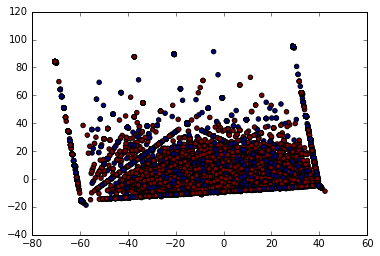

In [37]:
plt.scatter(reduced[:,0], reduced[:,1], c=labels)
plt.show()

That doesn't bode well.  Doesn't seem likely we'll be able to build a highly accurate classifier, but this can be deceiving; we're throwing away a lot of information projecting the data into two dimensions.  There are also some weird patterns here that imply some strange correlations.

An easy next step is to throw a bunch of classification techniques at it and see if we get lucky.